In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [4]:
gmm_cluster = GaussianMixture(n_components=2)

clusters = gmm_cluster.fit_predict(X_std)

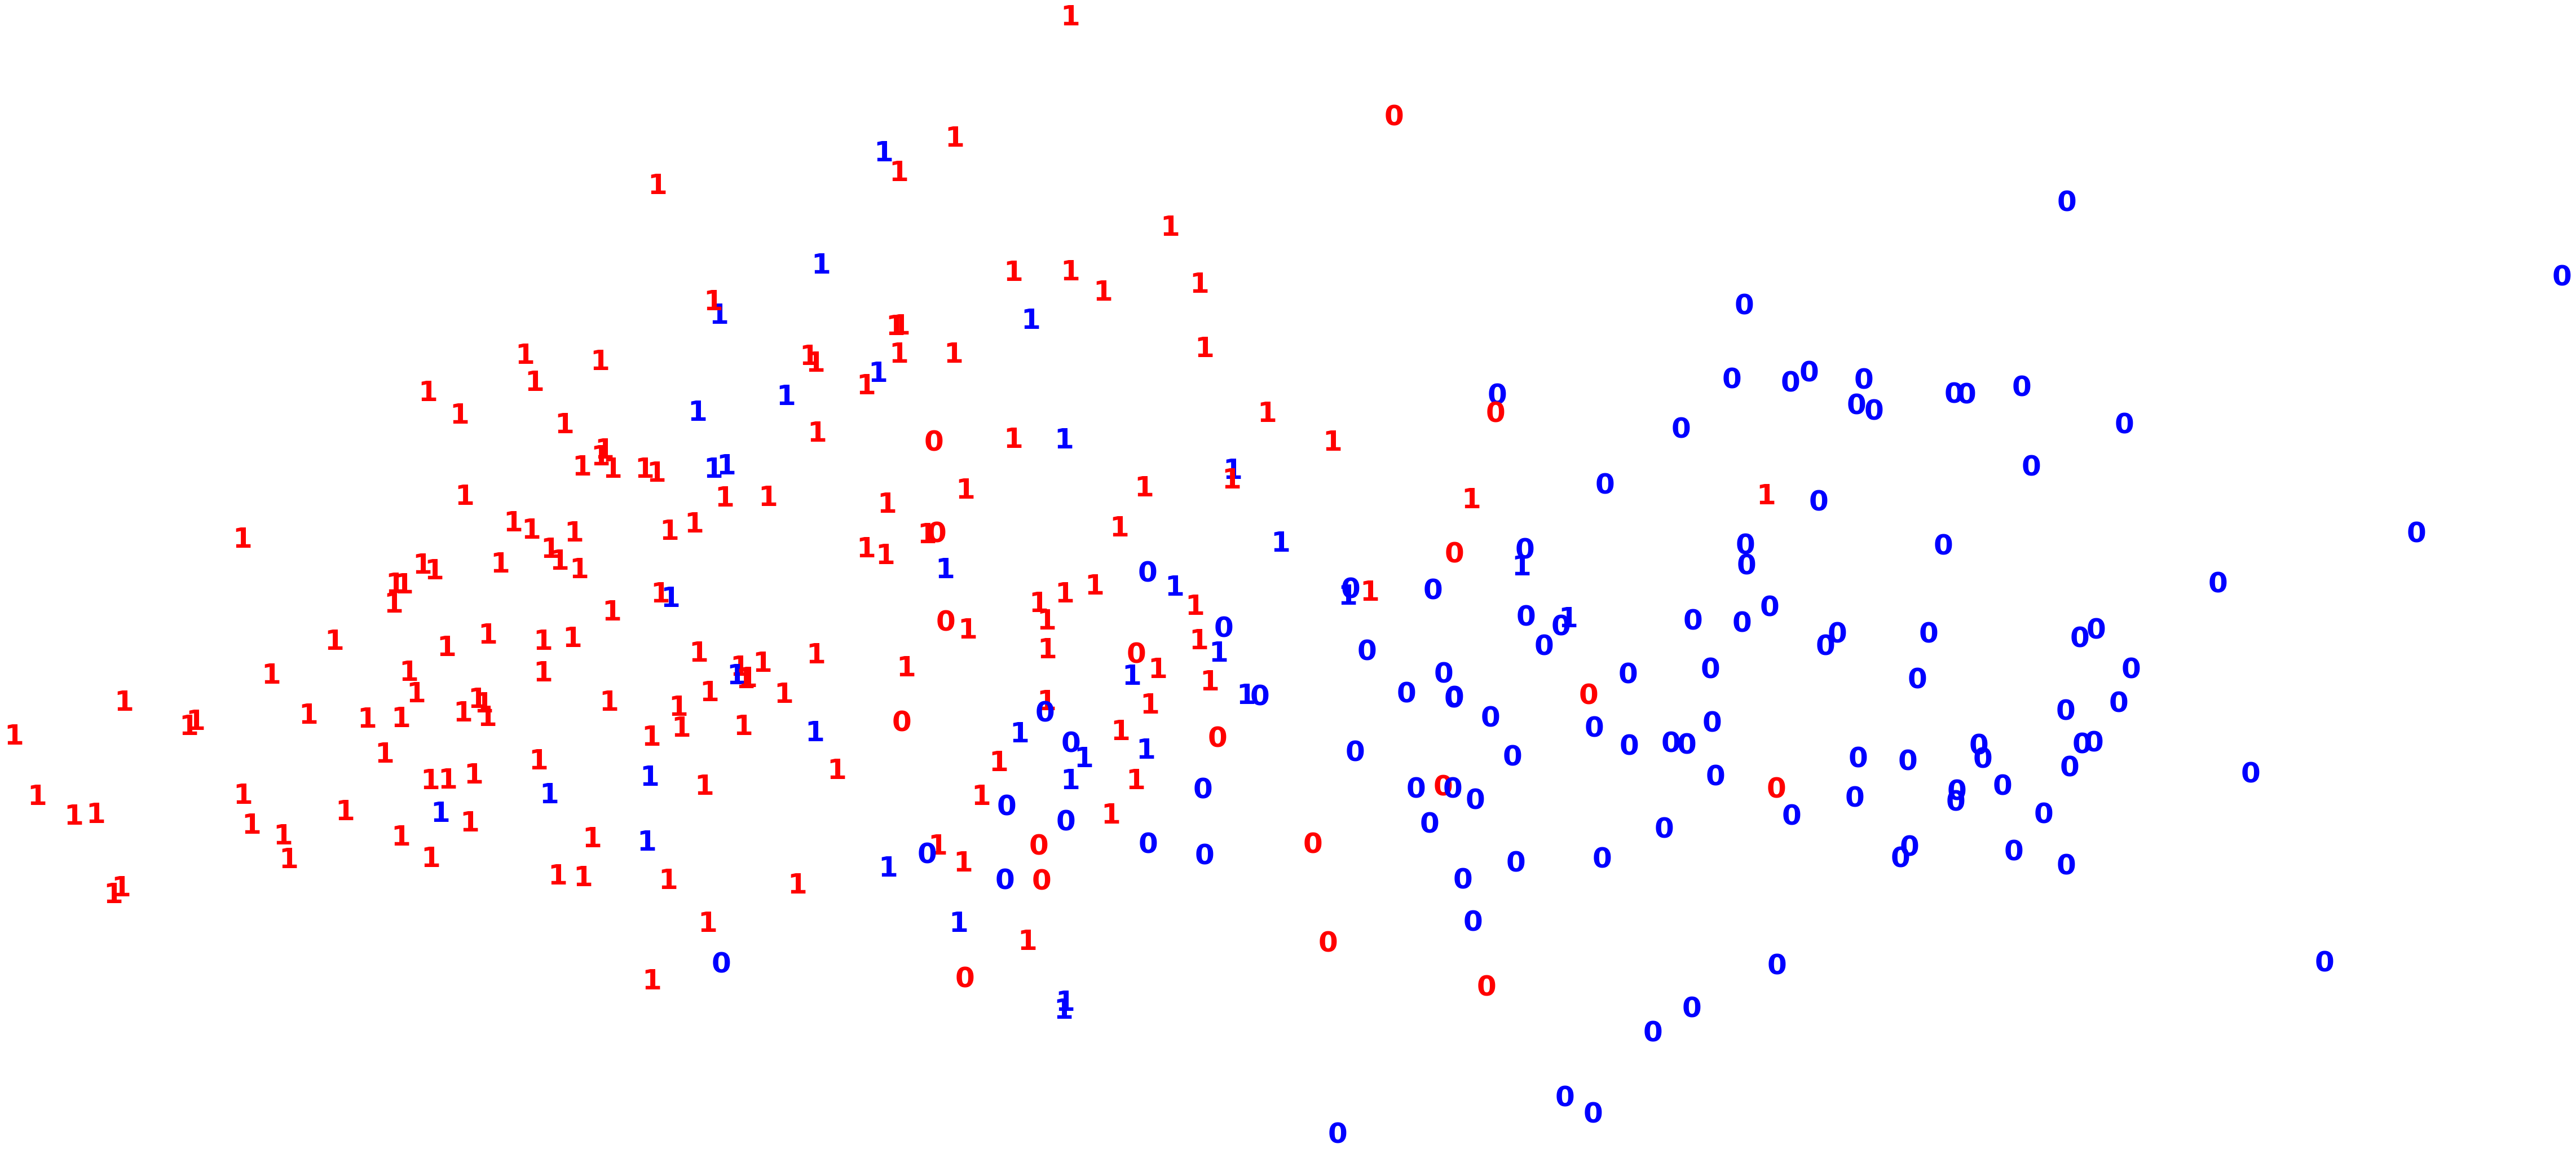

In [5]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [13]:
print("Adjusted Rand Index of the GMM full solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM full solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM full solution: 0.18389186035089963
The silhouette score of the GMM full solution: 0.13628813153331445


In [ ]:
# k-means and hierarchical clustering scores better than GMM 

In [16]:
gmm_cluster_tied = GaussianMixture(n_components=2, covariance_type = 'tied')
gmm_cluster_spherical = GaussianMixture(n_components=2, covariance_type = 'spherical')
gmm_cluster_diag = GaussianMixture(n_components=2, covariance_type = 'diag')


clusters_tied = gmm_cluster_tied.fit_predict(X_std)
clusters_spherical = gmm_cluster_spherical.fit_predict(X_std)
clusters_diag = gmm_cluster_diag.fit_predict(X_std)

print("Adjusted Rand Index of the GMM tied solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters_tied)))
print("The silhouette score of the GMM tied solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_tied, metric='euclidean')))

print("Adjusted Rand Index of the GMM spherical solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters_spherical)))
print("The silhouette score of the GMM spherical solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_spherical, metric='euclidean')))

print("Adjusted Rand Index of the GMM diagonal solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters_diag)))
print("The silhouette score of the GMM diagonal solution: {}"
      .format(metrics.silhouette_score(X_std, clusters_diag, metric='euclidean')))

Adjusted Rand Index of the GMM tied solution: 0.46482432589803474
The silhouette score of the GMM tied solution: 0.16607012124631088
Adjusted Rand Index of the GMM spherical solution: 0.20765243525722468
The silhouette score of the GMM spherical solution: 0.12468753110276873
Adjusted Rand Index of the GMM diagonal solution: 0.37878842718089933
The silhouette score of the GMM diagonal solution: 0.15836933745078682


In [15]:
# spherical highest silhouette score, tied best ARI 